In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pandas_datareader as wb
import matplotlib.pyplot as plt
import time
import math
import datetime
from datetime import date
from datetime import datetime
from scipy.stats import norm
from math import log, sqrt, pi, exp

# Single Barrier -> Call down and out
from SB_Standard import pricing_calldownandout
from SB_Modified import pricing_cdo_moon

%matplotlib inline

# -------------------------------------------

# Leere Tabelle erstellen
def nans(shape, dtype = float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a


print('libraries imported')

libraries imported


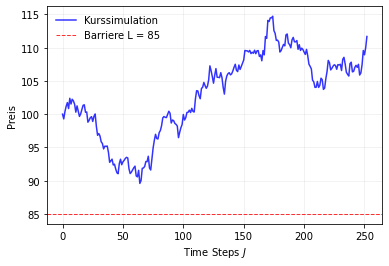

In [12]:
S = 100
L = 85
K = 100
sigma = 0.3
r = 0.1
T =  0.2
iterations = n = M = 1
fair_value = 6.3076
J = 252

np.random.seed(47)
iterations = int(iterations); J = int(J) ; dt = T/J; t = np.linspace(0,T,J+1)[:,None];
Z = np.random.randn(J,iterations); X = np.cumsum(Z,axis =0)
X = np.vstack((np.zeros(iterations),X));
sJ = S*np.exp((r-0.5*sigma**2)*t+sigma*np.sqrt(dt)*X)


plt.plot(sJ, label = 'Kurssimulation', color = 'blue', alpha = 0.8)
plt.axhline(y = 85, label = 'Barriere L = 85', color = 'red', linestyle = '--', linewidth = 1, alpha = 0.8)
#plt.axhline(y = 85, color = 'red', linestyle = '--', linewidth = 1, alpha = 0)
#plt.title("CEV - Constant Elasticity of Variance")
plt.xlabel('Time Steps $J$')
plt.ylabel('Preis')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('SB_Kurs_L.png', dpi = 1000, transparent = True)
plt.show()

# Single Barrier Options

## Standard Methode

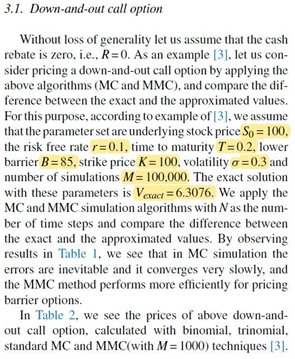
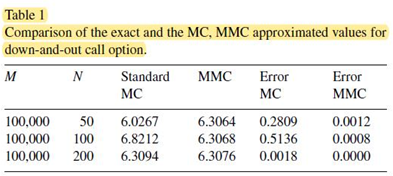

Iterations = M = 100’000

J = N (50,100,200)

In [2]:
np.random.seed(48)

S = 100
L = 85
K = 100
sigma = 0.3
r = 0.1
T =  0.2

iterations = n = M = 10**5

fair_value = 6.3076

test_range = [10**2,10**3,10**4]


column_names = test_range+['']
table_width = len(test_range)+1
table_empty = nans([7, table_width])
table_1 = pd.DataFrame(table_empty, columns = column_names)
table_1.iloc[0, 0] = 'n'
table_1.iloc[1, 0] = 'J'
table_1.iloc[2, 0] = 'Fair'
table_1.iloc[3, 0] = 'Preis'
table_1.iloc[4, 0] = 'Error'
table_1.iloc[5, 0] = 'Zeit'
table_1.iloc[6, 0] = 'Absolut'


for z in range(0,len(test_range)):
    
    zeit = datetime.now()
    print('-----------'+str(zeit.hour)+':'+str(zeit.minute)+':'+str(zeit.second)+'-----------')
    
    
    J = N = test_range[z]
    
    table_1.iloc[2, z] = fair_value
           
    table_1.iloc[0, z] = int(n)
    table_1.iloc[1, z] = int(J)
    print('n:',n,'\nJ:',J)
    
    print('Fair: ',round(fair_value,4))
    
    tic = time.perf_counter()

    price = pricing_calldownandout(S, sigma, T, r, J, iterations, L, K)
    
    toc = time.perf_counter()

        
    table_1.iloc[3, z] = price
    print('Preis:',round(price,4))
    
    error = fair_value - price
    table_1.iloc[4, z] = error
    if error < 0:
        print('Error:',round(abs(error),4),'zu hoch')
    else:
        print('Error:',round(error,4),'zu tief')
        
    absolut = abs(fair_value - price)
    table_1.iloc[6, z] = absolut
    
    ex_time = toc-tic
    table_1.iloc[5, z] = ex_time
    
    if (ex_time) > 3600:
        print('Zeit:',round(ex_time/3600,4),'Stunden')
    elif (ex_time < 60):
        print('Zeit:',round(ex_time,4),'Sekunden')
    else:
        print('Zeit:',round(ex_time/60,4),'Minuten')
table_1
table_1.to_excel('SB_Standard.xlsx')
#-----------------------------------------------------------------------------------------------------------------

np.random.seed(48)


column_names = test_range+['']
table_width = len(test_range)+1
table_empty = nans([7, table_width])
table_2 = pd.DataFrame(table_empty, columns = column_names)
table_2.iloc[0, 0] = 'n'
table_2.iloc[1, 0] = 'J'
table_2.iloc[2, 0] = 'Fair'
table_2.iloc[3, 0] = 'Preis'
table_2.iloc[4, 0] = 'Error'
table_2.iloc[5, 0] = 'Zeit'
table_2.iloc[6, 0] = 'Absolut'


for z in range(0,len(test_range)):
    #print('----------------------')
    
    zeit = datetime.now()
    print('-----------'+str(zeit.hour)+':'+str(zeit.minute)+':'+str(zeit.second)+'-----------')
    
    
    J = N = test_range[z]
    
    table_2.iloc[2, z] = fair_value
           
    table_2.iloc[0, z] = int(n)
    table_2.iloc[1, z] = int(J)
    print('n:',n,'\nJ:',J)
    
    print('Fair: ',round(fair_value,4))
    
    tic = time.perf_counter()

    price = pricing_cdo_moon(S, sigma, T, r, J, iterations, L, K)
    
    toc = time.perf_counter()

        
    table_2.iloc[3, z] = price
    print('Preis:',round(price,4))
    
    error = fair_value - price
    table_2.iloc[4, z] = error
    if error < 0:
        print('Error:',round(abs(error),4),'zu hoch')
    else:
        print('Error:',round(error,4),'zu tief')
    
    absolut = abs(fair_value - price)
    table_2.iloc[6, z] = absolut
    
    ex_time = toc-tic
    table_2.iloc[5, z] = ex_time
    
    if (ex_time) > 3600:
        print('Zeit:',round(ex_time/3600,4),'Stunden')
    elif (ex_time < 60):
        print('Zeit:',round(ex_time,4),'Sekunden')
    else:
        print('Zeit:',round(ex_time/60,4),'Minuten')
table_2
table_2.to_excel('SB_Modifiziert.xlsx')
print('\nEnde')

-----------21:9:11-----------
n: 100000 
J: 100
Fair:  6.3076
Preis: 6.3368
Error: 0.0292 zu hoch
Zeit: 0.3346 Sekunden
-----------21:9:12-----------
n: 100000 
J: 1000
Fair:  6.3076
Preis: 6.3355
Error: 0.0279 zu hoch
Zeit: 4.2824 Sekunden
-----------21:9:16-----------
n: 100000 
J: 10000
Fair:  6.3076
Preis: 6.3204
Error: 0.0128 zu hoch
Zeit: 46.65 Sekunden
-----------21:10:3-----------
n: 100000 
J: 100
Fair:  6.3076
Preis: 6.3349
Error: 0.0273 zu hoch
Zeit: 0.7662 Sekunden
-----------21:10:3-----------
n: 100000 
J: 1000
Fair:  6.3076
Preis: 6.3272
Error: 0.0196 zu hoch
Zeit: 8.486 Sekunden
-----------21:10:12-----------
n: 100000 
J: 10000
Fair:  6.3076
Preis: 6.3205
Error: 0.0129 zu hoch
Zeit: 1.5378 Minuten

Ende


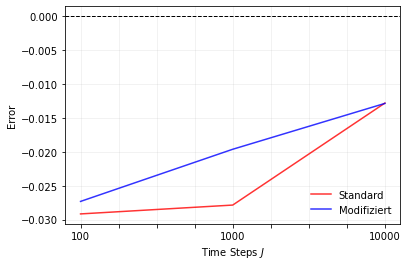

In [3]:
# Error Grafik normal

table_1.iloc[4].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[4].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Error')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('SB_Error_normal.png', dpi = 1000, transparent = True)

plt.show()

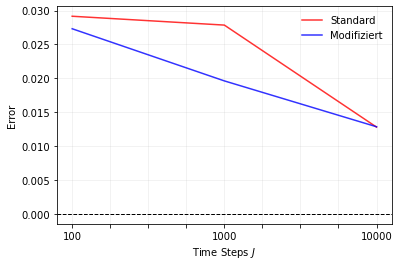

In [4]:
# Error Grafik absolut

table_1.iloc[6].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[6].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Error')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('SB_Error_absolut.png', dpi = 1000, transparent = True)

plt.show()

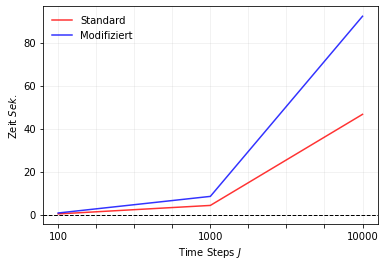

In [5]:
# Zeit Grafik

table_1.iloc[5].plot(kind = 'line', label = 'Standard', color = 'red', alpha = 0.8)
table_2.iloc[5].plot(kind = 'line', label = 'Modifiziert', color = 'blue', alpha = 0.8)
plt.axhline(y=0, color='black',linestyle='--', linewidth=1)
plt.xlabel('Time Steps $J$')
plt.ylabel('Zeit $Sek.$')
plt.legend(fancybox = True, framealpha=0)
plt.grid(alpha = 0.2)
plt.savefig('SB_Berechnungsdauer.png', dpi = 1000, transparent = True)

plt.show()